In [1]:
!pip install networkx

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 1.9 MB 3.0 MB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [23]:
## imports
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [7]:
## create directories IF_DO_NOT_EXIST
from pathlib import Path
Path("./results").mkdir(parents=True, exist_ok=True)
Path("./plots").mkdir(parents=True, exist_ok=True)


In [128]:
##read input files
football = nx.read_gml("./football/football.gml")
polbooks = nx.read_gml("./polbooks/polbooks.gml")

# NEWMAN_METHOD

In [10]:
## true_number_of_communities
polbook_true  = 3
football_true = 12

In [131]:
def Q_1_A(dataset, n_true):
    from networkx.algorithms import community
    community = community.girvan_newman(dataset)
    
    limited = itertools.takewhile(lambda c: len(c) <= n_true, community)
    community = []
    
    ## store the dendograms
    for communities in limited:
        community.append((tuple(sorted(c) for c in communities)))
    
    #sort according to the size of communities formed
    community = sorted(community, key=lambda x: len(x), reverse=True)
    return sorted(community[0],key=lambda x: len(x), reverse=True)
  

In [132]:
com_football = Q_1_A(football, football_true)
com_polbook  = Q_1_A(polbooks, polbook_true)

In [ ]:
com_football

In [134]:
## Composition of Datasets Q-1(A)
print(f"Dataset: {'Football'}\n Number of communities using Newman-Girvan method:{len(com_football)}")
print(f"Dataset: {'Polbooks'}\n Number of communities using Newman-Girvan method:{len(com_polbook)}")


Dataset: Football
 Number of communities using Newman-Girvan method:12
Dataset: Polbooks
 Number of communities using Newman-Girvan method:3


In [135]:
def Q_1_B(community):
    hist = {}
    for idx, member in enumerate(community):
        if len(member) not in hist.keys():
            hist[len(member)] = 1
        else:
            hist[len(member)] += 1
    return hist

In [136]:
def draw_plot(hist, com_name, method_name):

    names = sorted(list(hist.keys()))
    values = [hist[key] for key in names]
    plt.xlabel("community_size")
    plt.ylabel("Frequency")
    plt.title("Distribution of generated communities")
    plt.bar(range(len(hist)), values, tick_label=names)
    plt.show()
    plt.savefig('./results/'+com_name+'_'+method_name+'_dist.png')
    

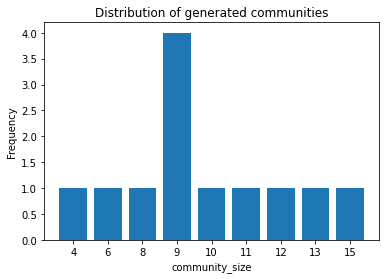

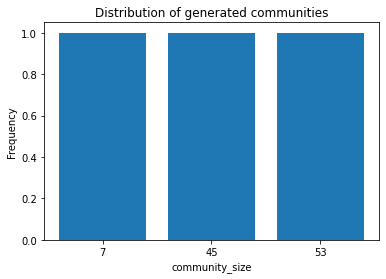

<Figure size 432x288 with 0 Axes>

In [137]:
##Q_1_B
draw_plot(Q_1_B(com_football),'Football','NEWMAN')
draw_plot(Q_1_B(com_polbook),'Polbooks','NEWMAN')

In [138]:
def Q_1_C(dataset,com_name,method_name):
    community = {}
    for node in dataset.nodes(data=True):
        n,v = node
        com = v["value"]
        if com not in community.keys():
            community[com] = 1
        else:
            community[com] += 1
    size_dist = sorted(list(community.values()))
    hist = {}
    for item in size_dist:
        if item not in hist.keys():
            hist[item] = 1
        else:
            hist[item] += 1
    
    names = sorted(list(hist.keys()))
    values = [hist[key] for key in names]
    plt.xlabel("community_size")
    plt.ylabel("Frequency")
    plt.title("Distribution of ground_truth_communities")
    plt.bar(range(len(hist)), values, tick_label=names)
    plt.show()
    plt.savefig('./results/'+'ground_truth_communities_dist_'+com_name+'_'+method_name+'.png')
    

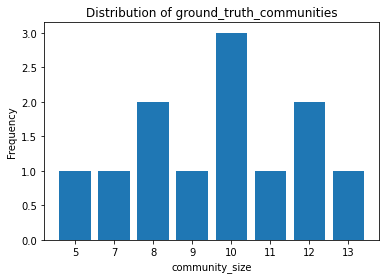

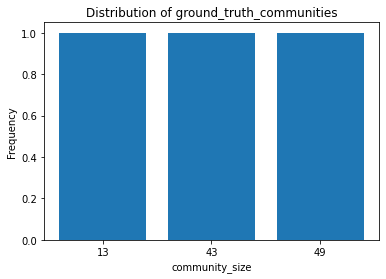

<Figure size 432x288 with 0 Axes>

In [139]:
##Q_1_C
Q_1_C(football,'Football','NEWMAN')
Q_1_C(polbooks,'Polbooks','NEWMAN')

In [152]:
def edges(graph,community):
    sub_graph = graph.subgraph(community)
    return sub_graph.size()

In [194]:
def Q_1_D(graph,community,dataset):
    n = min(5, len(community))
    for com in community[:n]:
        print(f"nodes = {len(com)}, edges = {edges(graph, com)} for {dataset}")

In [195]:
Q_1_D(football,com_football,'Football')
print('#'*41)
Q_1_D(polbooks,com_polbook,'Polbook')

nodes = 15, edges = 57 for Football
nodes = 13, edges = 50 for Football
nodes = 12, edges = 48 for Football
nodes = 11, edges = 44 for Football
nodes = 10, edges = 40 for Football
#########################################
nodes = 53, edges = 213 for Polbook
nodes = 45, edges = 183 for Polbook
nodes = 7, edges = 16 for Polbook


In [198]:
def Q_1_E(graph,community,dataset):
    nod = graph.number_of_nodes()
    edg = graph.number_of_edges()
    n = min(5, len(community))
    for idx,com in enumerate(community[:n]):
        print(f"coverage for {idx} = {edges(graph, com)/edg} for {dataset}")

In [201]:
Q_1_E(football,com_football,'Football')
print('#'*41)
Q_1_E(polbooks,com_polbook,'Polbook')

coverage for 0 = 0.0929853181076672 for Football
coverage for 1 = 0.08156606851549755 for Football
coverage for 2 = 0.07830342577487764 for Football
coverage for 3 = 0.07177814029363784 for Football
coverage for 4 = 0.06525285481239804 for Football
#########################################
coverage for 0 = 0.48299319727891155 for Polbook
coverage for 1 = 0.41496598639455784 for Polbook
coverage for 2 = 0.036281179138321996 for Polbook


In [178]:
def jaccard(set_a,set_b):
    set_c = set_a.intersection(set_b)
    return float(len(set_c)) / (len(set_a) + len(set_b) - len(set_c))

In [179]:
def gt_com(dataset):
    gt_data = {}
    for node in dataset.nodes(data=True):
        n,v = node
        com = v["value"]
        if com not in gt_data.keys():
            gt_data[com] = []
        gt_data[com].append(n)
    # sort gt
    gt_com_sorted = list(sorted(gt_data.items(), key = lambda x: len(x[1]), reverse=True))
    gt_com_sorted = [sorted(v) for c,v in gt_com_sorted]
    
    return gt_com_sorted[0]

In [180]:
def Q_1_F(dataset,community,data_name):
    gt_com(dataset)
    set_a = set(gt_com(dataset))
    set_b = set(community[0])
    print(f"jaccard for {data_name} = {jaccard(set_a,set_b)}")
    

In [181]:
Q_1_F(football,com_football,'Football')
print('#'*41)
Q_1_F(polbooks,com_polbook,'Polbook')

jaccard for Football = 0.8666666666666667
#########################################
jaccard for Polbook = 0.8214285714285714


# CLAUSET_METHOD

In [184]:
def q_1_a(dataset,data_name):
    clauset_communities = [list(x) for x in nx.algorithms.community.greedy_modularity_communities(dataset)]
    clauset_communities = sorted(clauset_communities, key = lambda x: len(x), reverse=True)
    clauset_sorted = [sorted(x) for x in clauset_communities]
    ans = len(clauset_sorted)
    print(f"Number of clauset_communities = {ans} for {data_name}")
    return clauset_sorted

In [185]:
football_clauset = q_1_a(football,'Football')
print('#'*41)
polbook_clauset = q_1_a(polbooks,'Polbook')

Number of clauset_communities = 6 for Football
#########################################
Number of clauset_communities = 4 for Polbook


In [191]:
def q_1_b(com,method_name,com_name):
    hist = {}
    for idx, member in enumerate(com):
        if len(member) not in hist.keys():
            hist[len(member)] = 1
        else:
            hist[len(member)] += 1
    
    names = sorted(list(hist.keys()))
    values = [hist[key] for key in names]
    plt.xlabel("community_size")
    plt.ylabel("Frequency")
    plt.title("Distribution of generated communities")
    plt.bar(range(len(hist)), values, tick_label=names)
    plt.show()
    plt.savefig('./results/'+com_name+'_'+method_name+'_dist.png')

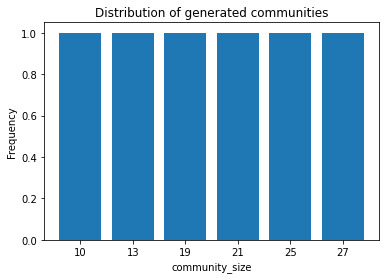

#########################################


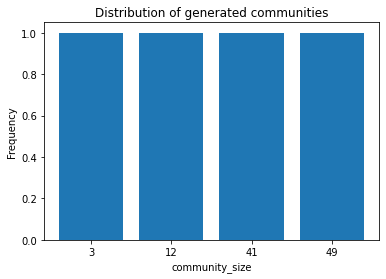

<Figure size 432x288 with 0 Axes>

In [192]:
q_1_b(football_clauset,'CLAUSET','Football')
print('#'*41)
q_1_b(polbook_clauset,'CLAUSET','Polbook')

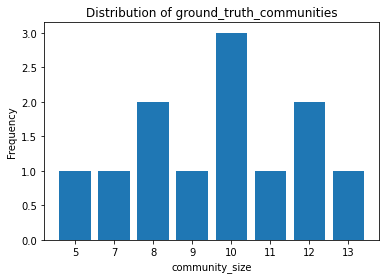

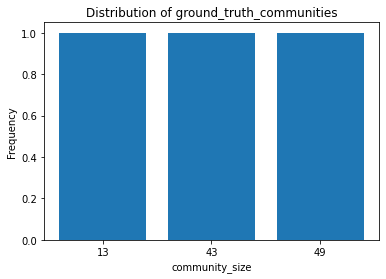

<Figure size 432x288 with 0 Axes>

In [204]:
##Q_1_C (Same_as_Above)
Q_1_C(football,'Football','NEWMAN')
Q_1_C(polbooks,'Polbooks','NEWMAN')

In [197]:
####1_d######
Q_1_D(football,football_clauset,'Football')
print('#'*41)
Q_1_D(polbooks,polbook_clauset,'Polbook')

nodes = 27, edges = 107 for Football
nodes = 25, edges = 105 for Football
nodes = 21, edges = 77 for Football
nodes = 19, edges = 78 for Football
nodes = 13, edges = 50 for Football
#########################################
nodes = 49, edges = 201 for Polbook
nodes = 41, edges = 176 for Polbook
nodes = 12, edges = 25 for Polbook
nodes = 3, edges = 3 for Polbook


In [202]:
#####1_e######
Q_1_E(football,football_clauset,'Football')
print('#'*41)
Q_1_E(polbooks,polbook_clauset,'Polbook')

coverage for 0 = 0.17455138662316477 for Football
coverage for 1 = 0.17128874388254486 for Football
coverage for 2 = 0.12561174551386622 for Football
coverage for 3 = 0.1272430668841762 for Football
coverage for 4 = 0.08156606851549755 for Football
#########################################
coverage for 0 = 0.4557823129251701 for Polbook
coverage for 1 = 0.39909297052154197 for Polbook
coverage for 2 = 0.05668934240362812 for Polbook
coverage for 3 = 0.006802721088435374 for Polbook


In [203]:
#######1_F#######
Q_1_F(football,football_clauset,'Football')
print('#'*41)
Q_1_F(polbooks,polbook_clauset,'Polbook')

jaccard for Football = 0.0
#########################################
jaccard for Polbook = 0.7818181818181819
